## importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## load the training dataset

In [4]:
google_data=pd.read_csv("Google_Stock_Price_Train.csv")
google_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


## using open stock price column to train model

In [12]:
training_set=google_data.iloc[ : ,1:2].values
print(training_set)
print(training_set.shape)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]
(20, 1)


## normalizing the dataset

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## creating x_train and y_train data structures

In [1]:
 x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append (scaled_training_set[i-60:i,0])
    y_train.append (scaled_training_set[i,0])
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    print(x_train.shape)
    print(y_train.shape)

(1198, 60)
(1198,)


In [2]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout


In [ ]:
regressor=Sequentail()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [5]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
dataset_test=pd.read_csv("Google_Stock_Price_Test.csv")
actual_stock_price=dataset_test.iloc[:,1:2].values

In [29]:
from sklearn.preprocessing import StandardScaler
dataset_total=pd.concat((google_data['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs= scaler.transform(inputs)
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [35]:
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

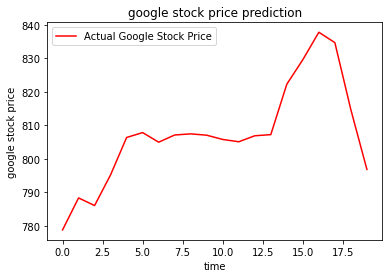

In [38]:
plt.plot(actual_stock_price,color='red',label='Actual Google Stock Price')
plt.title("google stock price prediction")
plt.xlabel("time")
plt.ylabel("google stock price")
plt.legend()